#Cifar 100

In [1]:
import keras
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
from keras import optimizers
# 이미지의 변화를 주기위한 라이브러리
from keras.preprocessing.image import ImageDataGenerator


num_classes = 100

img_rows, img_cols = 32, 32

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


169009152/169001437 [==============================] - 11s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## 클래스가 10개인 Multi class classification



In [2]:
print (x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 100) (10000, 32, 32, 3) (10000, 100)


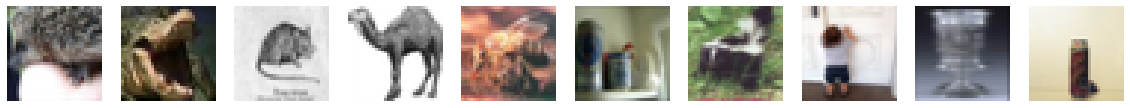

In [3]:
sample_size = 10

idx_s = np.random.randint(0,len(x_train), sample_size)
fig, ax = plt.subplots(1, sample_size, figsize=(sample_size * 2, 2))

for i in range(sample_size):
    ax[i].set_axis_off()
    ax[i].imshow(np.reshape(x_train[idx_s][i], [32, 32, 3]))

- 모델 구성

In [0]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, strides = (1,1), padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), strides = (1,1), padding = 'same'))
# 
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), strides = (1,1), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), strides = (1,1), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), strides = (1,1), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), strides = (1,1), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.adam(), metrics=['accuracy'])

- overfitting을 피하기 위해 data augmentation 사용

In [0]:
# data augmetation에 대한 변화 정도 설정
train_datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# train data에 대한 data augmentation
it_train = train_datagen.flow(x_train, y_train, batch_size = batch_size)

val_datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# test data에 대한 data augmentation
it_val = val_datagen.flow(x_test, y_test, batch_size = batch_size)

In [0]:
batch_size = 128
epochs = 50

# 모델 학습
model.fit_generator(it_train,
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data = it_val,
                    validation_steps = x_test.shape[0] // batch_size ,
                    shuffle=True,
                    verbose=1)

Epoch 1/50
390/390 [==============================] - 25s 64ms/step - loss: 1.3941 - acc: 0.5979 - val_loss: 1.6400 - val_acc: 0.5518
Epoch 2/50
390/390 [==============================] - 25s 63ms/step - loss: 1.3847 - acc: 0.6031 - val_loss: 1.5631 - val_acc: 0.5688
Epoch 3/50
390/390 [==============================] - 24s 63ms/step - loss: 1.3851 - acc: 0.5996 - val_loss: 1.5823 - val_acc: 0.5703
Epoch 4/50
390/390 [==============================] - 25s 64ms/step - loss: 1.3729 - acc: 0.6036 - val_loss: 1.5463 - val_acc: 0.5738
Epoch 5/50
390/390 [==============================] - 25s 63ms/step - loss: 1.3720 - acc: 0.6053 - val_loss: 1.4782 - val_acc: 0.5885
Epoch 6/50
390/390 [==============================] - 25s 64ms/step - loss: 1.3694 - acc: 0.6060 - val_loss: 1.5533 - val_acc: 0.5709
Epoch 7/50
390/390 [==============================] - 25s 64ms/step - loss: 1.3672 - acc: 0.6071 - val_loss: 1.5095 - val_acc: 0.5803
Epoch 8/50
390/390 [==============================] - 25s 63ms

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.4238482120513916
Test accuracy: 0.6112
